<a href="https://colab.research.google.com/github/seohsj/model_study/blob/master/first_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
from tensorflow.keras import layers, datasets

In [0]:
dataset=datasets.mnist
(train_x,train_y),(test_x,test_y)=dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_x.shape

(60000, 28, 28)

In [0]:
inputs = layers.Input((28, 28, 1))
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(10)(net)  # num_classes
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0 

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss="sparse_categorical_crossentropy",metrics=[tf.keras.metrics.Accuracy()])

In [0]:
train_x.shape

(60000, 28, 28)

In [0]:
train_x=train_x[...,tf.newaxis]
test_x=test_x[...,tf.newaxis]

In [0]:
train_x.shape, train_y.shape

((60000, 28, 28, 1), (60000,))

In [0]:
train_x=train_x/255.
test_x=test_x/255.

In [0]:
np.max(train_x), np.min(train_x)

(1.0, 0.0)

In [0]:
num_epochs = 5
batch_size = 32

In [0]:
hist = model.fit(train_x, train_y, 
                 batch_size=batch_size, 
                 shuffle=True, 
                 epochs=num_epochs)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 259us/sample - loss: 0.1471 - accuracy: 1.8667e-04
Epoch 2/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0594 - accuracy: 3.3667e-04
Epoch 3/5
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0455 - accuracy: 8.2833e-04
Epoch 4/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0370 - accuracy: 0.0015
Epoch 5/5
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0335 - accuracy: 0.0013


In [0]:
hist.history

{'accuracy': [0.00018666667,
  0.00033666668,
  0.0008283333,
  0.001485,
  0.0012966667],
 'loss': [0.14709677408126492,
  0.059439304142755764,
  0.04553187953143303,
  0.03700174507523867,
  0.033477375265522274]}

In [0]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0 

In [0]:
model.evaluate(test_x,test_y,batch_size)

10000/10000 [==============================] - 1s 86us/sample - loss: 0.0261 - accuracy: 0.0000e+00


[0.02605477168979269, 0.0]

In [0]:
test_image=test_x[0]
test_image.shape

(28, 28, 1)

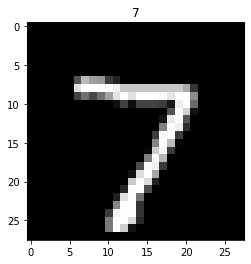

In [0]:
plt.imshow(test_image[:,:,0],"gray")
plt.title(test_y[0])
plt.show()

In [0]:
test_image=test_image[tf.newaxis,...]
test_image.shape

(1, 28, 28, 1)

In [0]:
pred=model.predict(test_image,batch_size)

In [0]:
np.argmax(pred)

7

In [0]:
test_batch=test_x[:32]
test_batch.shape

(32, 28, 28, 1)

In [0]:
pred_batch=model.predict(test_batch,batch_size)
np.argmax(pred_batch,-1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1])

In [0]:
test_y[1]

2